# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_api_key

'375b06c2bfa9b62cd34eb840f954c3ad'

In [4]:
#api.openweathermap.org/data/2.5/weather?q=London&APPID=375b06c2bfa9b62cd34eb840f954c3ad

In [5]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

print("Beginning Data Retrival")
print("-------------------------")

record_count=1
set_count=1
weather_by_city = {}
for i, city in enumerate(cities):
    if(i%50==0 and i>=50):
        record_count=0
        set_count=set_count+1

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count+1
    try:
        city_url=url+city
        city_weather = rq.get(city_url).json()
        weather_by_city[city] = city_weather
    except:
        pass
        

Beginning Data Retrival
-------------------------
Processing Record 1 of Set 1 | mehamn
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | aksu
Processing Record 4 of Set 1 | kirakira
Processing Record 5 of Set 1 | surin
Processing Record 6 of Set 1 | karamea
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kalabo
Processing Record 11 of Set 1 | karla
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | marshfield
Processing Record 14 of Set 1 | male
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | crawfordsville
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | sidi ali
Processing Record 19 of Set 1 | vagur
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | kuching
Processing Record 22 of Set 1 | dubbo
Processing Record 23 of Set 1 | meyungs
Processing Record 24 

Processing Record 49 of Set 4 | port alfred
Processing Record 0 of Set 5 | tocopilla
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | ardistan
Processing Record 3 of Set 5 | houma
Processing Record 4 of Set 5 | silute
Processing Record 5 of Set 5 | greytown
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | porto nacional
Processing Record 8 of Set 5 | magdalena
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | malakal
Processing Record 11 of Set 5 | nyurba
Processing Record 12 of Set 5 | mullaitivu
Processing Record 13 of Set 5 | chokwe
Processing Record 14 of Set 5 | saint anthony
Processing Record 15 of Set 5 | asayita
Processing Record 16 of Set 5 | muhos
Processing Record 17 of Set 5 | paamiut
Processing Record 18 of Set 5 | santa cruz de la palma
Processing Record 19 of Set 5 | morro bay
Processing Record 20 of Set 5 | marcona
Processing Record 21 of Set 5 | khonuu
Processing Record 22 of Set 5 | beloha
Processing Rec

Processing Record 2 of Set 9 | alcantara
Processing Record 3 of Set 9 | chama
Processing Record 4 of Set 9 | staraya toropa
Processing Record 5 of Set 9 | mys shmidta
Processing Record 6 of Set 9 | mayo
Processing Record 7 of Set 9 | lakhnadon
Processing Record 8 of Set 9 | katherine
Processing Record 9 of Set 9 | rangoon
Processing Record 10 of Set 9 | smithers
Processing Record 11 of Set 9 | margate
Processing Record 12 of Set 9 | santa eulalia del rio
Processing Record 13 of Set 9 | west bay
Processing Record 14 of Set 9 | reconquista
Processing Record 15 of Set 9 | kudahuvadhoo
Processing Record 16 of Set 9 | nehe
Processing Record 17 of Set 9 | vredendal
Processing Record 18 of Set 9 | angoram
Processing Record 19 of Set 9 | tayga
Processing Record 20 of Set 9 | marathon
Processing Record 21 of Set 9 | karratha
Processing Record 22 of Set 9 | dudinka
Processing Record 23 of Set 9 | aban
Processing Record 24 of Set 9 | torbay
Processing Record 25 of Set 9 | east valencia
Processing

Processing Record 48 of Set 12 | manicore
Processing Record 49 of Set 12 | po
Processing Record 0 of Set 13 | tandil
Processing Record 1 of Set 13 | sept-iles
Processing Record 2 of Set 13 | srednekolymsk
Processing Record 3 of Set 13 | bombay
Processing Record 4 of Set 13 | vila velha
Processing Record 5 of Set 13 | kalmunai
Processing Record 6 of Set 13 | namatanai
Processing Record 7 of Set 13 | porto de moz
Processing Record 8 of Set 13 | rafsanjan
Processing Record 9 of Set 13 | inverell
Processing Record 10 of Set 13 | los llanos de aridane
Processing Record 11 of Set 13 | mushie
Processing Record 12 of Set 13 | quang ngai
Processing Record 13 of Set 13 | beresti-sat
Processing Record 14 of Set 13 | viru
Processing Record 15 of Set 13 | puerto madero
Processing Record 16 of Set 13 | ust-tsilma
Processing Record 17 of Set 13 | cockburn town
Processing Record 18 of Set 13 | coahuayana
Processing Record 19 of Set 13 | adrar
Processing Record 20 of Set 13 | skibbereen
Processing Reco

In [6]:
w = weather_by_city['hami']
w

{'coord': {'lon': 93.45, 'lat': 42.8},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 11.73,
  'feels_like': 5.13,
  'temp_min': 11.73,
  'temp_max': 11.73,
  'pressure': 1029,
  'humidity': 62,
  'sea_level': 1029,
  'grnd_level': 912},
 'wind': {'speed': 0.65, 'deg': 274},
 'clouds': {'all': 52},
 'dt': 1580154245,
 'sys': {'country': 'CN', 'sunrise': 1580173538, 'sunset': 1580208724},
 'timezone': 28800,
 'id': 1529484,
 'name': 'Kumul',
 'cod': 200}

In [7]:
def get_weather(w):
    """ w is json of weather """
    temp = w['main']['temp']
    humidity = w['main']['humidity']
    cloudiness = w['clouds']['all']
    wind = w['wind']['speed']
    lat = w['coord']['lat']
    lon = w['coord']['lon']
    return temp, humidity, cloudiness, wind, lat, lon

In [8]:
get_weather(weather_by_city['hami'])

(11.73, 62, 52, 0.65, 42.8, 93.45)

In [9]:
weather_df = pd.DataFrame()

count = 0
for city, weath in weather_by_city.items():
    if weath['cod'] != 200:
        continue  # no data for that city
    t,h,c,w,lat,lon = get_weather(weath)
    d = {'Temp':t, 'Humidity':h, 'Clouds':c, 'Wind':w, 'Lat':lat, 'Lon':lon}
    ser = pd.Series(d, name=city)
    weather_df = weather_df.append(ser)

weather_df

,Clouds,Humidity,Lat,Lon,Temp,Wind
mehamn,75.0,72.0,71.04,27.85,17.60,77.17
ponta do sol,20.0,68.0,32.67,-17.10,60.13,8.05
aksu,0.0,65.0,41.12,80.26,22.69,1.59
kirakira,100.0,81.0,-10.45,161.92,80.62,4.25
surin,100.0,85.0,14.88,103.49,75.99,5.19
...,...,...,...,...,...,...
coahuayana,20.0,50.0,18.73,-103.68,77.00,8.81
adrar,0.0,20.0,20.50,-10.07,75.51,11.32
skibbereen,75.0,65.0,51.55,-9.27,35.60,14.99
enshi,99.0,97.0,30.30,109.48,30.45,0.74


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df.to_csv("weather.csv")

In [11]:
weather_df

,Clouds,Humidity,Lat,Lon,Temp,Wind
mehamn,75.0,72.0,71.04,27.85,17.60,77.17
ponta do sol,20.0,68.0,32.67,-17.10,60.13,8.05
aksu,0.0,65.0,41.12,80.26,22.69,1.59
kirakira,100.0,81.0,-10.45,161.92,80.62,4.25
surin,100.0,85.0,14.88,103.49,75.99,5.19
...,...,...,...,...,...,...
coahuayana,20.0,50.0,18.73,-103.68,77.00,8.81
adrar,0.0,20.0,20.50,-10.07,75.51,11.32
skibbereen,75.0,65.0,51.55,-9.27,35.60,14.99
enshi,99.0,97.0,30.30,109.48,30.45,0.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

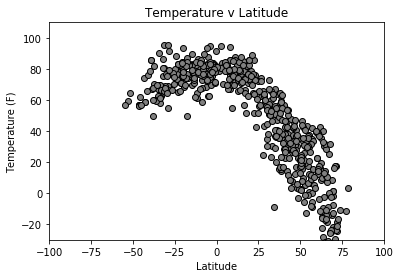

In [12]:
lat_plot = (weather_df.loc[:,"Lat"])
temp_plot = (weather_df.loc[:,"Temp"])

#plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")

plt.scatter(lat_plot, temp_plot, marker="o", facecolors="gray", edgecolors="black")

plt.title("Temperature v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.ylim(-30, 110)
plt.xlim(-100, 100)

plt.savefig("../WeatherPy/temperatures_plot.png")
plt.show()

#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#            s=x_axis, alpha=0.75)

#### Latitude vs. Humidity Plot

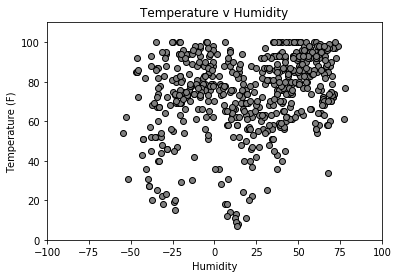

In [18]:
hum_plot = (weather_df.loc[:,"Humidity"])

plt.scatter(lat_plot, hum_plot, marker="o", facecolors="gray", edgecolors="black")

plt.title("Temperature v Humidity")
plt.xlabel("Humidity")
plt.ylabel("Temperature (F)")

plt.ylim(0, 110)
plt.xlim(-100, 100)

plt.savefig("../WeatherPy/humidity_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

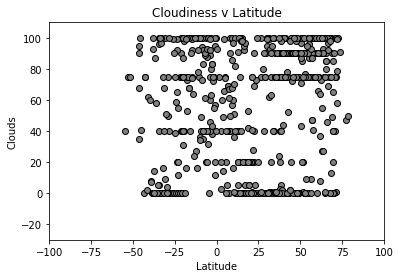

In [19]:
cloud_plot = (weather_df.loc[:,"Clouds"])

plt.scatter(lat_plot, cloud_plot, marker="o", facecolors="gray", edgecolors="black")

plt.title("Cloudiness v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Clouds")

plt.ylim(-30, 110)
plt.xlim(-100, 100)

plt.savefig("../WeatherPy/cloudiness_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

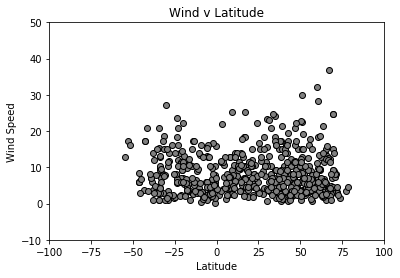

In [20]:
wind_plot = (weather_df.loc[:,"Wind"])

plt.scatter(lat_plot, wind_plot, marker="o", facecolors="gray", edgecolors="black")

plt.title("Wind v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.ylim(-10, 50)
plt.xlim(-100, 100)

plt.savefig("../WeatherPy/wind_plot.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
# import seaborn as sns
# sns.replot

In [17]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression